In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib

Q1

In [ ]:
training_data = pd.read_csv("training_dataset.csv")
test_data_body = pd.read_csv("testing_bodytrack.csv")
test_data_black = pd.read_csv("testing_blackscholes.csv")
training_data

,total_watts,w_big,w_little,w_gpu,w_mem,usage_c4,usage_c5,usage_c6,usage_c7,temp4,temp5,temp6,temp7,temp_gpu,freq_big_cluster
0,3.065,0.474810,0.033012,0.096321,0.048800,0.0,0.0,0.0,0.0,49,53,52,48,47,1000000000
1,2.706,0.235620,0.032095,0.096515,0.032940,0.0,0.0,0.0,0.0,48,52,52,48,47,1000000000
2,2.706,0.235620,0.034846,0.096515,0.032940,0.0,0.0,0.0,0.0,48,52,52,48,47,1000000000
3,2.637,0.234685,0.034846,0.096321,0.037758,0.0,0.0,0.0,0.0,48,51,51,48,47,1000000000
4,2.637,0.233750,0.033929,0.096321,0.032886,0.0,0.0,0.0,0.0,48,51,51,48,47,1000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410,3.844,1.157646,0.039474,0.123132,0.035380,0.0,0.0,0.0,0.0,63,67,67,62,60,2000000000
5411,3.851,1.157646,0.038514,0.123132,0.036600,0.0,0.0,0.0,0.0,63,67,67,62,60,2000000000
5412,3.851,1.156364,0.041310,0.124125,0.036600,0.0,0.0,0.0,0.0,63,67,67,62,60,2000000000
5413,3.851,1.158024,0.037638,0.124125,0.036600,0.0,0.0,0.0,0.0,63,67,67,62,60,2000000000


In [ ]:
test_data_body

,total_watts,w_big,w_little,w_gpu,w_mem,usage_c4,usage_c5,usage_c6,usage_c7,temp4,temp5,temp6,temp7,temp_gpu,freq_big_cluster
0,2.981,0.465327,0.034884,0.119160,0.03050,0.000000,0.0000,0.0,0.0,59,63,63,59,58,1500000000
1,2.973,0.525705,0.036720,0.119160,0.04026,0.000000,0.1875,0.0,0.0,59,63,63,59,58,1500000000
2,2.973,0.525705,0.039474,0.119160,0.04026,0.000000,0.0000,0.0,0.0,59,63,63,59,58,1500000000
3,2.973,0.465920,0.036720,0.119160,0.03660,0.000000,0.0000,0.0,0.0,59,63,63,59,58,1500000000
4,2.973,0.464286,0.036720,0.119160,0.03050,0.000000,0.0000,0.0,0.0,59,63,62,59,58,1500000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,3.084,0.484065,0.037597,0.130083,0.03538,0.142857,0.0000,0.0,0.0,63,67,67,63,61,1500000000
1450,3.084,0.545484,0.039431,0.130083,0.03538,0.000000,0.0000,0.0,0.0,63,67,67,63,62,1500000000
1451,3.168,0.484640,0.039431,0.130083,0.03660,0.000000,0.0000,0.0,0.0,63,67,66,63,62,1500000000
1452,3.084,0.485106,0.042182,0.130083,0.03660,0.000000,0.0000,0.0,0.0,63,67,66,63,61,1500000000


In [ ]:
y_train = training_data['w_big']
y_test_body= test_data_body['w_big']
y_test_black = test_data_black['w_big']
X_train = training_data.drop(['w_big'], axis = 1)
X_test_body = test_data_body.drop(['w_big'], axis = 1)
X_test_black = test_data_black.drop(['w_big'], axis = 1)

y_test_body

0       0.465327
1       0.525705
2       0.525705
3       0.465920
4       0.464286
          ...   
1449    0.484065
1450    0.545484
1451    0.484640
1452    0.485106
1453    0.485106
Name: w_big, Length: 1454, dtype: float64

In [ ]:
y_train.loc[y_train < 1.0] = 0
y_train.loc[y_train >= 1.0] = 1
y_test_body.loc[y_test_body < 1.0] = 0
y_test_body.loc[y_test_body > 1.0] = 1
y_test_black.loc[y_test_black < 1.0] = 0
y_test_black.loc[y_test_black > 1.0] = 1

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
X_train['freq_big_cluster'] /= 1000000
X_train['temp4'] /= 100
X_train['temp5'] /= 100
X_train['temp6'] /= 100
X_train['temp7'] /= 100

In [ ]:
X_train.head()

,total_watts,w_little,w_gpu,w_mem,usage_c4,usage_c5,usage_c6,usage_c7,temp4,temp5,temp6,temp7,temp_gpu,freq_big_cluster
0,3.065,0.033012,0.096321,0.048800,0.0,0.0,0.0,0.0,0.0049,0.0053,0.0052,0.0048,47,0.001
1,2.706,0.032095,0.096515,0.032940,0.0,0.0,0.0,0.0,0.0048,0.0052,0.0052,0.0048,47,0.001
2,2.706,0.034846,0.096515,0.032940,0.0,0.0,0.0,0.0,0.0048,0.0052,0.0052,0.0048,47,0.001
3,2.637,0.034846,0.096321,0.037758,0.0,0.0,0.0,0.0,0.0048,0.0051,0.0051,0.0048,47,0.001
4,2.637,0.033929,0.096321,0.032886,0.0,0.0,0.0,0.0,0.0048,0.0051,0.0051,0.0048,47,0.001


In [ ]:
training_data.head()

,total_watts,w_big,w_little,w_gpu,w_mem,usage_c4,usage_c5,usage_c6,usage_c7,temp4,temp5,temp6,temp7,temp_gpu,freq_big_cluster
0,3.065,0.0,0.033012,0.096321,0.048800,0.0,0.0,0.0,0.0,49,53,52,48,47,1000000000
1,2.706,0.0,0.032095,0.096515,0.032940,0.0,0.0,0.0,0.0,48,52,52,48,47,1000000000
2,2.706,0.0,0.034846,0.096515,0.032940,0.0,0.0,0.0,0.0,48,52,52,48,47,1000000000
3,2.637,0.0,0.034846,0.096321,0.037758,0.0,0.0,0.0,0.0,48,51,51,48,47,1000000000
4,2.637,0.0,0.033929,0.096321,0.032886,0.0,0.0,0.0,0.0,48,51,51,48,47,1000000000


In [ ]:
standard_scaler = StandardScaler()
X_train_scale = standard_scaler.fit_transform(X_train)
X_test_body_scale= standard_scaler.fit_transform(X_test_body)
X_test_black_scale= standard_scaler.fit_transform(X_test_black)

In [ ]:
from sklearn.preprocessing import PowerTransformer, RobustScaler, Normalizer, QuantileTransformer, MinMaxScaler

In [ ]:
powerTrans = MinMaxScaler()
X_train_power = powerTrans.fit_transform(X_train)
X_test_body_power = powerTrans.fit_transform(X_test_body)
X_test_black_power = powerTrans.fit_transform(X_test_black)

In [ ]:
X_train_scale[0]

array([-0.32608688, -0.63501233, -0.76262975,  1.74159832, -0.29015982,
       -0.29386691, -0.28500997, -0.2879534 , -0.71678879, -0.60275197,
       -0.68960949, -0.81056576, -0.85822628, -0.70384816])

In [ ]:
X_train_power[0]

array([0.10354413, 0.13494861, 0.01944365, 0.49989781, 0.        ,
       0.        , 0.        , 0.        , 0.02857143, 0.05      ,
       0.02222222, 0.        , 0.        , 0.09090909])

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
parameters = [{
'kernel': ['poly','linear', 'rbf', 'sigmoid'], 
'C': [1,2,3,50,100,200,300,400,500],
'max_iter': [1000,100000,10000000],
'random_state': [42]
}]

In [ ]:
clf = GridSearchCV(
        SVC(), parameters, scoring='accuracy'
    )
clf.fit(X_train_scale, y_train)
print(clf.best_params_)

{'C': 2, 'kernel': 'sigmoid', 'max_iter': 1000, 'random_state': 42}


In [ ]:
model = SVC(kernel = "poly", random_state= 42, degree=5, gamma='scale', tol = .001, max_iter=1000,C=50)
model.fit(X_train_scale, y_train)

SVC(C=50, degree=5, kernel='poly', max_iter=1000, random_state=42)

In [ ]:
prediction_body = model.predict(X_test_body_scale)
print("Accuracy for bodytrack: ", accuracy_score(y_test_body,prediction_body))
print("F1 for bodytrack: ", f1_score(y_test_body,prediction_body))
print("Recall for bodytrack: ", recall_score(y_test_body,prediction_body))
print("Precision for bodytrack: ", precision_score(y_test_body,prediction_body))

Accuracy for bodytrack:  0.9834938101788171
F1 for bodytrack:  0.9867695700110254
Recall for bodytrack:  0.98568281938326
Precision for bodytrack:  0.9878587196467992


In [ ]:
from sklearn.linear_model import Ridge
from imblearn.over_sampling import RandomOverSampler
model = Ridge(alpha=0.1)
model = SVC(kernel = "poly", random_state= 42, degree=5, gamma='scale', tol = .001, max_iter=1000 , C= 50)
model.fit(X_train_scale, y_train)

SVC(C=50, degree=5, kernel='poly', max_iter=1000, random_state=42)

In [ ]:
prediction_black = model.predict(X_test_black_scale)
print("Accuracy for blackscholes: ", accuracy_score(y_test_black, prediction_black))
print("F1 for blackscholes: ", f1_score(y_test_black,prediction_black))
print("Recall for blacksholes: ", recall_score(y_test_black,prediction_black))
print("Precision for blacksholes: ", precision_score(y_test_black,prediction_black))

Accuracy for blackscholes:  0.8173018753781004
F1 for blackscholes:  0.8410526315789473
Recall for blacksholes:  0.7276867030965392
Precision for blacksholes:  0.9962593516209476


In [ ]:
from sklearn import metrics
confusion_matrix_body = metrics.confusion_matrix(y_test_body, prediction_body)
confusion_matrix_black = metrics.confusion_matrix(y_test_black, prediction_black)

body_score = model.score(X_test_body, y_test_body)
black_score = model.score(X_test_black, y_test_black)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Text(0.5, 1.0, 'Confusion Matrix for Bodytrack Dataset')

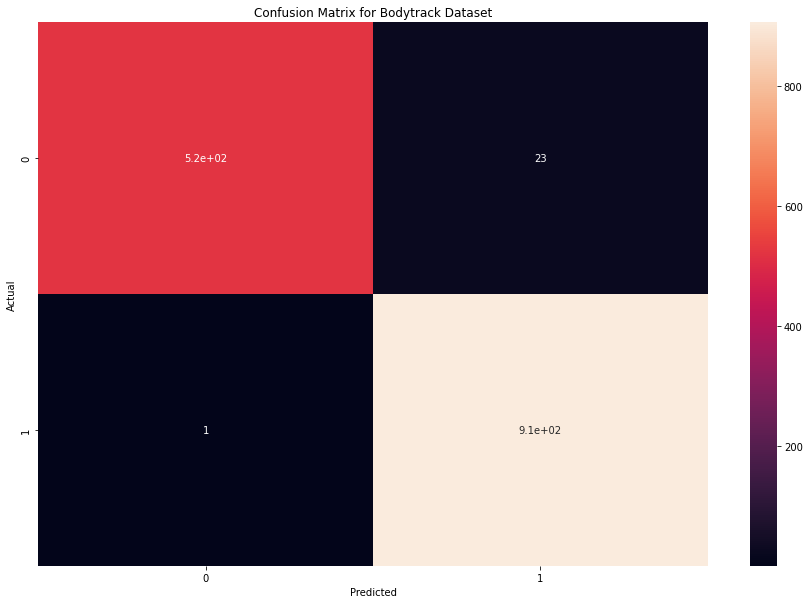

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix_body, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix for Bodytrack Dataset")

Text(0.5, 1.0, 'Confusion Matrix for Blackscholes Dataset')

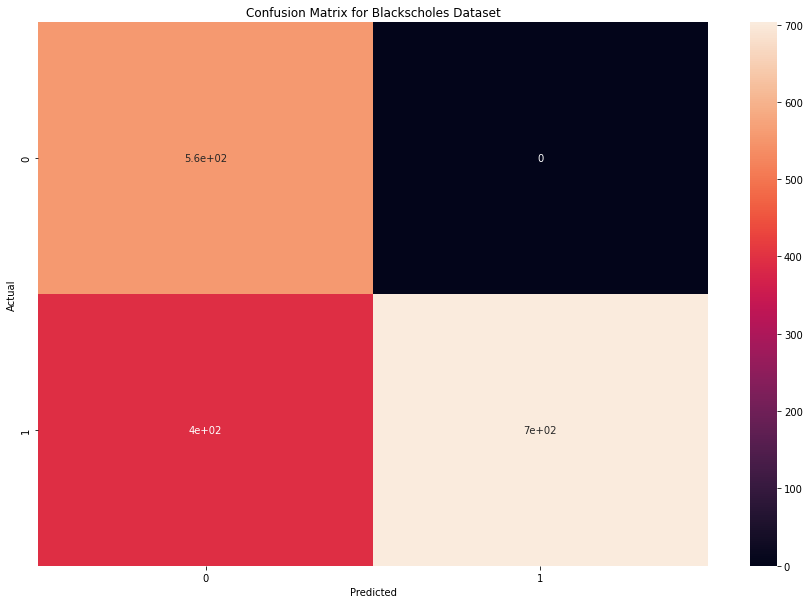

In [ ]:
sns.heatmap(confusion_matrix_black, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix for Blackscholes Dataset")

Q2

In [ ]:
from sklearn.linear_model import LinearRegression

training_data = pd.read_csv("training_dataset.csv")
test_data_body = pd.read_csv("testing_bodytrack.csv")
test_data_black = pd.read_csv("testing_blackscholes.csv")

y_train = training_data['w_big']
y_test_body= test_data_body['w_big']
y_test_black = test_data_black['w_big']

X_train = training_data.drop(['w_big', 'total_watts', 'w_little', 'w_gpu','w_mem'], axis = 1)
X_test_body = test_data_body.drop(['w_big', 'total_watts', 'w_little', 'w_gpu','w_mem'], axis = 1)
X_test_black = test_data_black.drop(['w_big', 'total_watts', 'w_little', 'w_gpu','w_mem'], axis = 1)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

lr_pred_train = linear_regressor.predict(X_train)
lr_pred_body = linear_regressor.predict(X_test_body)
lr_pred_black = linear_regressor.predict(X_test_black)

print("r2 for training", r2_score(y_train,lr_pred_train))
print("MSE for training", mean_squared_error(y_train,lr_pred_train))

print("r2 for bodytrack", r2_score(y_test_body,lr_pred_body))
print("MSE for bodytrack", mean_squared_error(y_test_body,lr_pred_body))


print("r2 for blackscholes", r2_score(y_test_black,lr_pred_black))
print("MSE for blackscholes", mean_squared_error(y_test_black,lr_pred_black))

r2 for training 0.9869761626648632
MSE for training 0.010151781665943445
r2 for bodytrack 0.922431361655208
MSE for bodytrack 0.12156466120474674
r2 for blackscholes 0.9566269820977236
MSE for blackscholes 0.05941814545432009


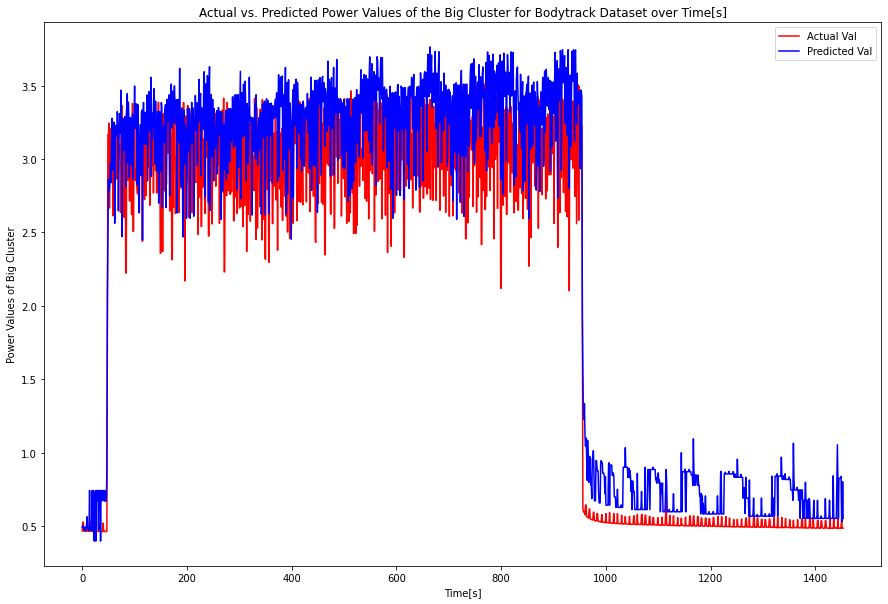

In [ ]:
plt.title("Actual vs. Predicted Power Values of the Big Cluster for Bodytrack Dataset over Time[s]")
plt.plot(y_test_body, 'r', label = 'Actual Val')
plt.plot(lr_pred_body, 'b', label = 'Predicted Val')
plt.xlabel('Time[s]')
plt.ylabel('Power Values of Big Cluster')
plt.legend()


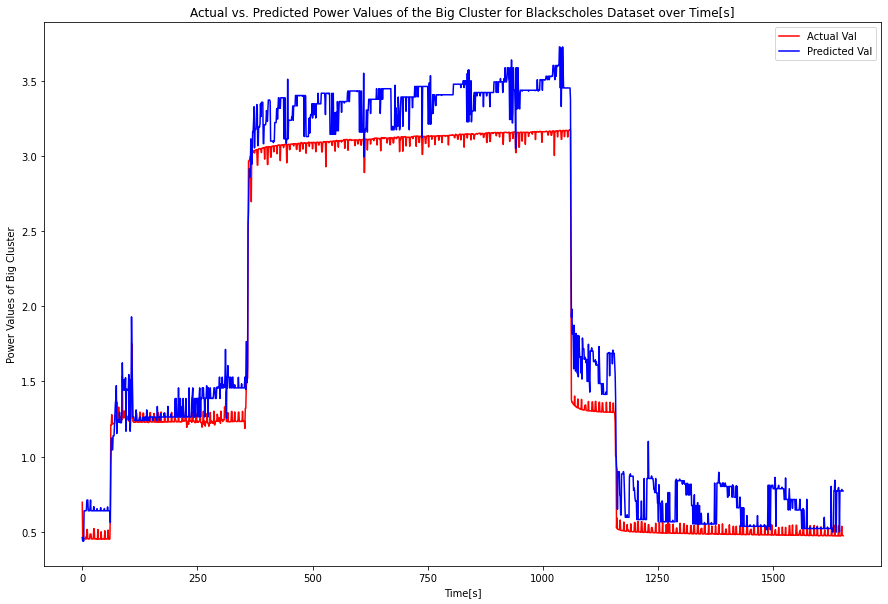

In [ ]:
plt.title("Actual vs. Predicted Power Values of the Big Cluster for Blackscholes Dataset over Time[s]")
plt.plot(y_test_black, 'r', label = 'Actual Val')
plt.plot(lr_pred_black, 'b', label = 'Predicted Val')
plt.xlabel('Time[s]')
plt.ylabel('Power Values of Big Cluster')
plt.legend()

Q3

In [ ]:
training_data = pd.read_csv("training_dataset.csv")
y_train = training_data['w_big']
X_train = training_data.drop(['w_big', 'total_watts', 'w_little', 'w_gpu','w_mem'], axis = 1)

In [ ]:
X_train

,usage_c4,usage_c5,usage_c6,usage_c7,temp4,temp5,temp6,temp7,temp_gpu,freq_big_cluster
0,0.0,0.0,0.0,0.0,49,53,52,48,47,1000000000
1,0.0,0.0,0.0,0.0,48,52,52,48,47,1000000000
2,0.0,0.0,0.0,0.0,48,52,52,48,47,1000000000
3,0.0,0.0,0.0,0.0,48,51,51,48,47,1000000000
4,0.0,0.0,0.0,0.0,48,51,51,48,47,1000000000
...,...,...,...,...,...,...,...,...,...,...
5410,0.0,0.0,0.0,0.0,63,67,67,62,60,2000000000
5411,0.0,0.0,0.0,0.0,63,67,67,62,60,2000000000
5412,0.0,0.0,0.0,0.0,63,67,67,62,60,2000000000
5413,0.0,0.0,0.0,0.0,63,67,67,62,60,2000000000


In [ ]:
X_train['power'] = X_train['freq_big_cluster'].apply(lambda x: .975**2 * x if x == 900000000
                                                     else(1**2 * x if x == 1000000000 else(1.1375**2*x if x == 1500000000 else 1.362**2 * x)))


In [ ]:
X_train

,usage_c4,usage_c5,usage_c6,usage_c7,temp4,temp5,temp6,temp7,temp_gpu,freq_big_cluster,power
0,0.0,0.0,0.0,0.0,49,53,52,48,47,1000000000,1.000000e+09
1,0.0,0.0,0.0,0.0,48,52,52,48,47,1000000000,1.000000e+09
2,0.0,0.0,0.0,0.0,48,52,52,48,47,1000000000,1.000000e+09
3,0.0,0.0,0.0,0.0,48,51,51,48,47,1000000000,1.000000e+09
4,0.0,0.0,0.0,0.0,48,51,51,48,47,1000000000,1.000000e+09
...,...,...,...,...,...,...,...,...,...,...,...
5410,0.0,0.0,0.0,0.0,63,67,67,62,60,2000000000,3.710088e+09
5411,0.0,0.0,0.0,0.0,63,67,67,62,60,2000000000,3.710088e+09
5412,0.0,0.0,0.0,0.0,63,67,67,62,60,2000000000,3.710088e+09
5413,0.0,0.0,0.0,0.0,63,67,67,62,60,2000000000,3.710088e+09


In [ ]:
standard_scaler = StandardScaler()
X_train_stand = standard_scaler.fit_transform(X_train)

lr = LinearRegression()
lr.fit(X_train,y_train)

feature_importance = lr.coef_
for feature,score in enumerate(feature_importance):
  print((feature,score))

features_top_3 = feature_importance.argsort()[-3:]

print(features_top_3)

(0, 0.08797332905421572)
(1, 0.05836087717359779)
(2, -0.0036975798175960645)
(3, 0.11205210421280233)
(4, 0.12315152516379987)
(5, 0.0715940582176262)
(6, 0.022444775620421128)
(7, 0.07070365503027573)
(8, -0.27384089617562957)
(9, -3.094449099738661e-09)
(10, 1.1865150945089553e-09)
[0 3 4]


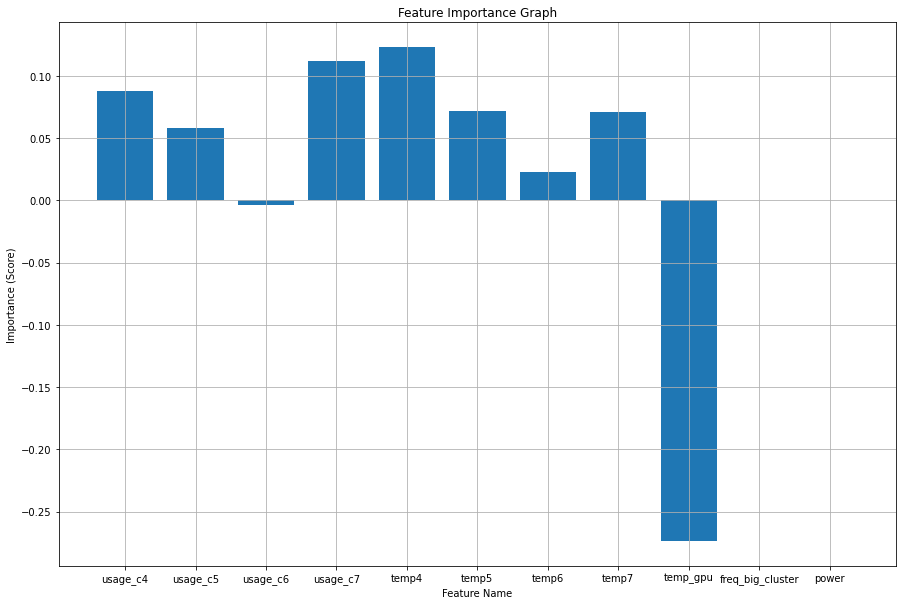

In [ ]:
plt.title("Feature Importance Graph")
plt.xlabel('Feature Name')
plt.grid(True)
plt.ylabel('Importance (Score)')
matplotlib.rc('figure', figsize=(15, 10))
plt.bar(X_train.columns.values.tolist(),feature_importance)
plt.show()

In [ ]:
X_train.shape

(5415, 11)

In [ ]:
X_train[5000]

KeyError: ignored